## Curve fitting and the $\chi^2$ error surface
#### Material to accompany Hughes and Hase Section 6.5

Marty Ligare August 2020

In [1]:
import numpy as np
from scipy import optimize
from scipy import stats

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [2]:
# Following is an Ipython magic command that puts figures in notebook.
%matplotlib notebook

# M.L. modification of matplotlib defaults
# Changes can also be put in matplotlibrc file, 
# or effected using mpl.rcParams[]
mpl.style.use('classic') 
plt.rc('figure', figsize = (6, 4.5)) # Reduces overall size of figures
plt.rc('axes', labelsize=16, titlesize=14)
plt.rc('figure', autolayout = True) # Adjusts supblot params for new size

#### Define  functions

In [3]:
def f(x,m,b):
    '''Simple linear function with slope m and intercept b'''
    return x*m + b

def chi2(x, y, u, m, b):
    '''Chisquare as a function of data (x, y, and yerr=u), and model 
    parameters slope and intercept (m and b)'''
    return np.sum((y - f(x, m, b))**2/u**2)

### Linear fit to data for $m$ and $b$

#### Data to be fit:

In [4]:
# Or: data = np.loadtxt("file.dat")  
# Format:  [[x1,y1,u1], [x2,y2,u2], ... ]   where u1 is uncertainty in y1
data = np.array([[1, 2.947032612427293, 0.5],
 [2, 6.168779380682309, 0.5],
 [3, 7.1618838821688, 0.5],
 [4, 9.590549514954866, 0.5],
 [5, 11.20657, 0.5]])

x, y, u = data.T

<IPython.core.display.Javascript object>


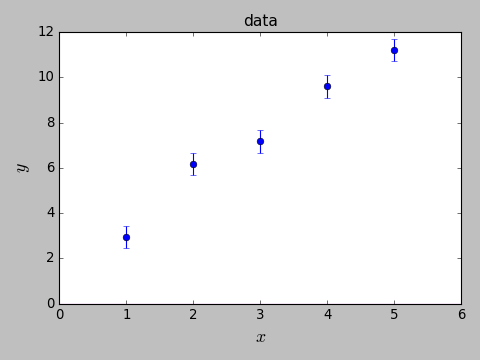

In [5]:
xc = np.linspace(0,6,201) # quasi-continuous set of x's for function plot
plt.figure()
plt.title("data",fontsize=14)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.axhline(0,color='magenta')
plt.xlim(0,6) 
plt.errorbar(x,y,yerr=u,fmt='o');

#### Perform fit

In [6]:
popt, pcov = optimize.curve_fit(f, x, y, sigma=u, absolute_sigma=True)

slope = popt[0]
alpha_m = np.sqrt(pcov[0,0])  # Std error in slope
intercept = popt[1]
alpha_b = np.sqrt(pcov[1,1])  # Std error in intercept

print("slope =", slope,"+/-", alpha_m,"\n")
print("intercept =", intercept,"+/-", alpha_b,"\n")

print("covariance matrix =","\n",pcov,"\n")
pcov_data = pcov

print("chi2 =", chi2(x, y, u,*popt))
# print("reduced chi2 = chi2/(len(x)-len(popt)) =", chi2(x, y, u, *popt)/(len(x)-len(popt)))

a = chi2(x,y,u,*popt)

slope = 1.994084490943965 +/- 0.15811389158461894 

intercept = 1.4327096052222066 +/- 0.5244044422749461 

covariance matrix = 
 [[ 0.025      -0.07500001]
 [-0.07500001  0.27500002]] 

chi2 = 3.700621429959703


<IPython.core.display.Javascript object>


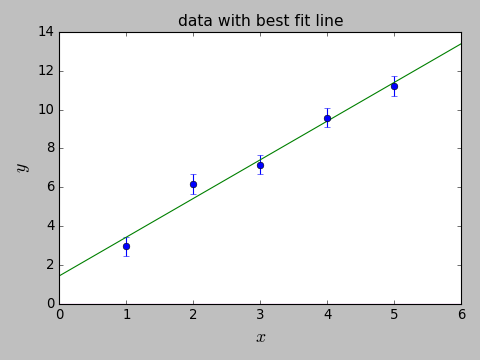

In [7]:
xc = np.linspace(0,6,201) # quasi-continuous set of x's function plot
plt.figure()
plt.title("data with best fit line",fontsize=14)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.axhline(0, color='magenta')
plt.xlim(0,6)  # Pad x-range on plot
plt.errorbar(x, y, yerr=u, fmt='o');
plt.plot(xc ,f(xc, slope, intercept));

#### Residuals:

<IPython.core.display.Javascript object>


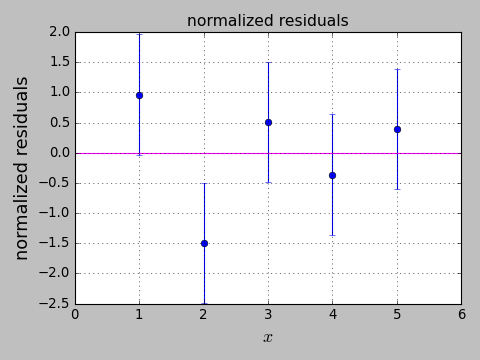

In [8]:
plt.figure()
plt.axhline(0,color='magenta')
plt.title('normalized residuals')
plt.xlabel('$x$')
plt.ylabel('normalized residuals')
plt.grid(True)
plt.errorbar(x,(f(x,slope,intercept)-y)/u,1,fmt='o')
plt.xlim(0,6);

#### Make "data" for contour plot
+ Choose ranges of $m$ and $b$ for contour plot
+ Make meshgrid of slope and intercept values
+ Calculate values of $\chi^2$ at grid points

In [9]:
m = np.linspace(1.5, 2.5, 201)
b = np.linspace(0.5, 2.5, 201)
M, B = np.meshgrid(m, b, indexing='ij')

Z = np.zeros((len(m),len(b)))

for i in range(len(m)):
    for j in range(len(b)):
        Z[i,j] = chi2(x, y, u, m[i],b[j]) - chi2(x, y, u, *popt)

<IPython.core.display.Javascript object>


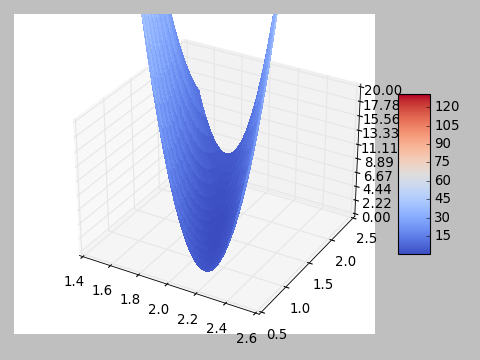

In [10]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Plot the surface.
surf = ax.plot_surface(M, B, Z, cmap=cm.coolwarm,
                      linewidth=0, antialiased=False)
#surf = ax.plot_surface(M, B, Z, 
#                     linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(0, 20)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5);

<IPython.core.display.Javascript object>


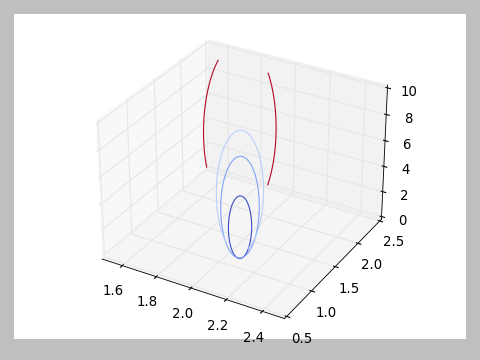

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#M, B, Z = axes3d.get_test_data(0.05)
cset = ax.contour(M, B, Z, cmap=cm.coolwarm, levels=[1,2.7,4,9])
ax.clabel(cset, fontsize=9, inline=1)
ax.set_zlim(0,10);

<IPython.core.display.Javascript object>


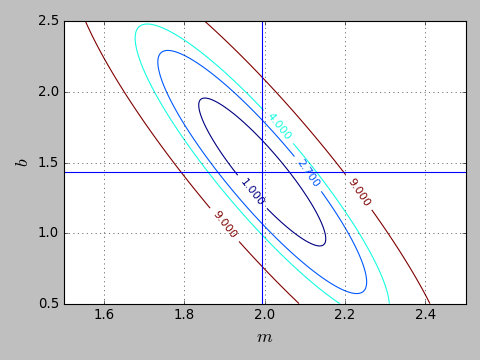

In [12]:
plt.figure()
CS = plt.contour(M, B, Z, levels=[1,2.7,4,9])
plt.xlabel('$m$')
plt.ylabel('$b$')
plt.grid()
plt.axhline(intercept)
#plt.axhline(intercept + alpha_b, linestyle='--')
#plt.axhline(intercept - alpha_b, linestyle='--')
plt.axvline(slope)
#plt.axvline(slope + alpha_m,linestyle='--')
#plt.axvline(slope - alpha_m,linestyle='--')
plt.clabel(CS, inline=1, fontsize=10);

### What confidence can we have in the model?
If normalized residuals look ok:
+ <i>Assume</i> the model, along with the best fit parameters are ok ("null hypothesis") 
+ Generate simulated data based on the model, best-fit parameters, and uncertainties.
(Use same $x$ values).
+ Fit each of the simulated data sets
+ What's the probability of getting values of $\chi^2$ from the simulated data sets 
that are greater than the value given by the data that was actually measured.
In other words, is our value of $\chi^2$ a reasonable result given the fluctuations we
expect in our data?

In [13]:
n_sim = 10000               # Number of data sets to simulate
count = 0
for i in range(n_sim):
    mSim = np.array([])      # Array for simulated slopes
    bSim = np.array([])      # Array for simulated intercepts
    chi_sim = np.array([])   # Array for chisq from simulated sets

for i in range(n_sim):
    ySim = stats.norm.rvs(slope*x+intercept,u) # Generate simulated data set
    popt, pcov = optimize.curve_fit(f, x, ySim, sigma=u, absolute_sigma=True)  # Fit simulated data
    bSim = np.append(bSim, popt[1])      # Record intercept
    mSim = np.append(mSim, popt[0])      # Record slope
    aa = chi2(x,ySim,u,*popt) 
    chi_sim = np.append(chi_sim, aa)
    if aa > a:
        count += 1
    
print(count/n_sim)

0.2955


In [14]:
1 - stats.chi2.cdf(3.700621, df=3)

0.2956591105179691

####  Simple examples of meshgrid

In [15]:
a = np.array([1,2,3])
b = np.array([6,7,8,9])

A, B = np.meshgrid(a,b, indexing='ij')
A2, B2 = np.meshgrid(a,b)

In [16]:
print(A,'\n\n')
print(B)

[[1 1 1 1]
 [2 2 2 2]
 [3 3 3 3]] 


[[6 7 8 9]
 [6 7 8 9]
 [6 7 8 9]]


In [17]:
print(A2,'\n\n')
print(B2)

[[1 2 3]
 [1 2 3]
 [1 2 3]
 [1 2 3]] 


[[6 6 6]
 [7 7 7]
 [8 8 8]
 [9 9 9]]


#### Version information

+ %version_information is an IPython magic extension for showing version information for dependency modules in a notebook; 

+ See `https://github.com/jrjohansson/version_information`

+ `%version_information` is available on Bucknell computers on the linux network.  You can easily install it on
any computer.

In [18]:
%load_ext version_information

In [19]:
%version_information numpy, scipy, matplotlib

Software versions
Python 3.7.8 64bit [GCC 7.5.0]
IPython 7.17.0
OS Linux 3.10.0 1062.9.1.el7.x86_64 x86_64 with centos 7.8.2003 Core
numpy 1.19.1
scipy 1.5.0
matplotlib 3.3.0
Fri Aug 21 16:37:35 2020 EDT